## Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dtiii

## Datasets

In [2]:
sales = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation Case Study 4 - Python Visualization Case Study/SalesData.csv')

### 1.	Compare Sales by region for 2016 with 2015 using bar chart

<AxesSubplot:xlabel='Region'>

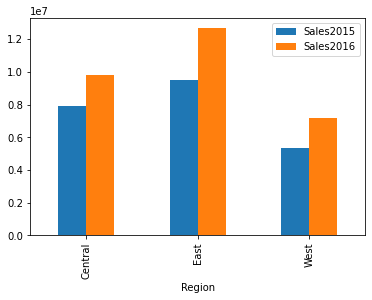

In [3]:
df1 = pd.pivot_table(sales,values=['Sales2015','Sales2016'],index='Region',aggfunc='sum')
df1.plot(kind = 'bar')

### 2.	Pie charts for sales for each region in 2016

<AxesSubplot:ylabel='Sales2016'>

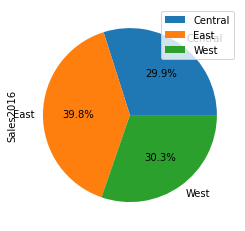

In [4]:
df2 = pd.pivot_table(sales,values='Sales2016',index='Region')
df2.plot(y = 'Sales2016',kind='pie',autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2b9c7ab4220>,
 [Text(0.6787718257252399, 0.9283150373669624, 'Central'),
  Text(-1.1499129122490759, 0.014152534855963433, 'East'),
  Text(0.6672959783516886, -0.9365981407603065, 'West')],
 [Text(0.38365364062730944, 0.5246998037291526, '29.9%'),
  Text(-0.6499507764886081, 0.007999258831631505, '39.8%'),
  Text(0.3771672921118239, -0.5293815578210427, '30.3%')])

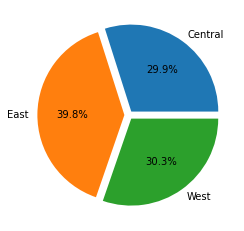

In [169]:
plt.pie(x=df2.Sales2016,explode= [0.05,0.05,0.05],labels= df2.index ,autopct='%1.1f%%')

### 3.	Compare sales of 2015 and 2016 with Region and Tiers

In [29]:
df3 = sales.loc[:,['Region','Tier','Sales2015','Sales2016']]
df4 = df3.melt(id_vars= ['Region','Tier'],var_name='saleyr',value_name = 'tot_sale')

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


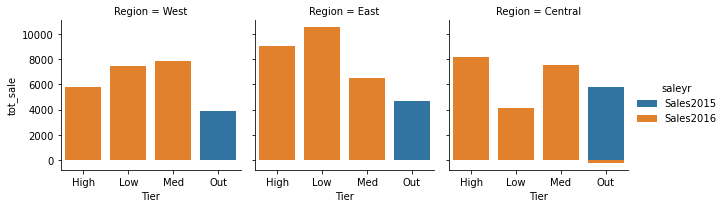

In [31]:
df5 = sns.FacetGrid(df4, col = 'Region', hue = 'saleyr')
df6 = (df5.map(sns.barplot, 'Tier', 'tot_sale', ci = None).add_legend())

### 4.	In East region, which state registered a decline in 2016 as compared to 2015?

In [38]:
df7 = sales.loc[sales.Region == 'East',['State','Sales2015','Sales2016']]
df8 = df7.melt(id_vars = 'State',var_name='saleyr',value_name = 'tot_sale')

<AxesSubplot:xlabel='State', ylabel='tot_sale'>

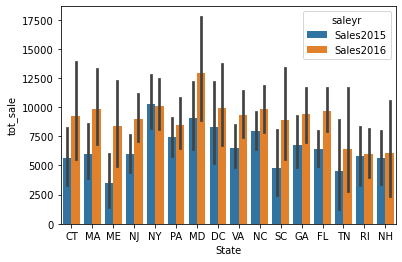

In [43]:
sns.barplot(data=df8,x='State',y ='tot_sale',hue='saleyr')

### 5.	In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [52]:
df9 = sales.loc[sales.Tier == 'High',['Division','Units2015','Units2016']]
df10 = df9.melt(id_vars='Division',var_name='saleyr',value_name='tot_ut')

<AxesSubplot:xlabel='Division', ylabel='tot_ut'>

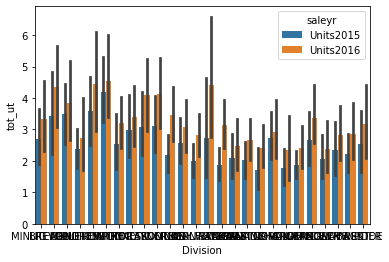

In [54]:
sns.barplot(data=df10,x='Division',y = 'tot_ut',hue='saleyr')

### 6.	Create a new column Qtr -
##### •	Jan - Mar : Q1
##### •	Apr - Jun : Q2
##### •	Jul - Sep : Q3
##### •	Oct - Dec : Q4

In [72]:
sales['Qtr'] = np.where(sales.Month.isin(['Jan','Feb','Mar']),'Q1',
               np.where(sales.Month.isin(['Apr','May','Jun']),'Q2',
               np.where(sales.Month.isin(['Jul','Aug','Sep']),'Q3','Q4')))

### 7.	Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [79]:
df11 = sales[['Qtr','Sales2015','Sales2016']]
df12 = df11.melt(id_vars='Qtr',var_name='saleyr',value_name='tot_sale')

<AxesSubplot:xlabel='Qtr', ylabel='tot_sale'>

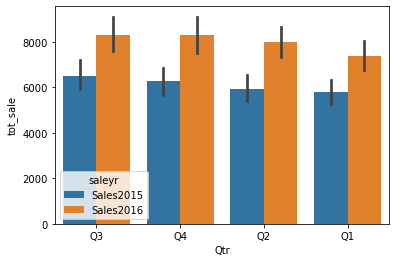

In [80]:
sns.barplot(data=df12,x = 'Qtr',y = 'tot_sale',hue='saleyr')

### 8.	Determine the composition of Qtr wise sales in and 2015 with regards to all the Tiers in a pie chart.
##### (Draw 4 pie charts representing a Quarter for each Tier)


In [92]:
sales.Sales2015 = np.where(sales.Sales2015<0,0,sales.Sales2015)

In [116]:
df13 = pd.pivot_table(data=sales,index="Tier",columns="Qtr",values="Sales2015",aggfunc='sum')

In [139]:
df14 = df13['Q1']
df15 = df13['Q2']
df16 = df13['Q3']
df17 = df13['Q4']

Text(0.5, 1.0, 'Q4')

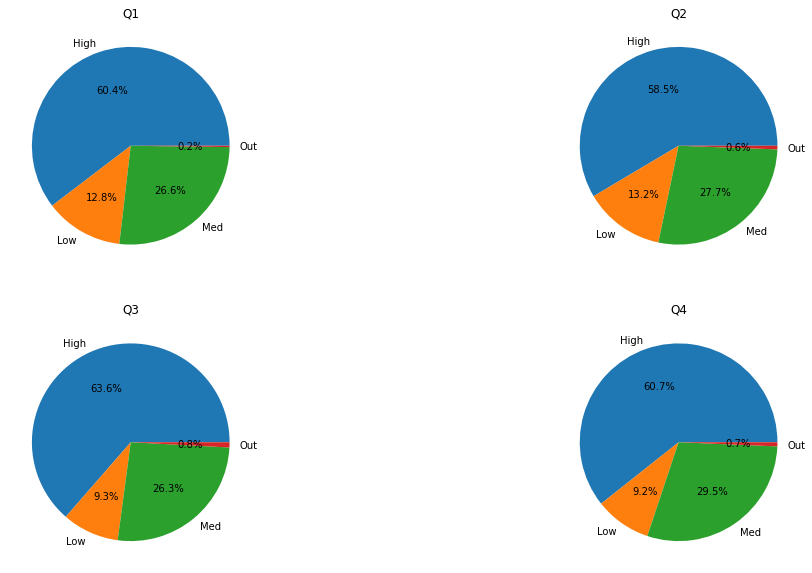

In [166]:
fig = plt.figure(figsize=(18,10))
#1
ax = plt.subplot2grid((2,2),(0,0))
plt.pie(data=df14,x =df14.values,autopct='%.1f%%',labels=df14.index)
plt.title('Q1')
#2
ax = plt.subplot2grid((2,2),(0,1))
plt.pie(data=df15,x =df15.values,autopct='%.1f%%',labels=df15.index)
plt.title('Q2')
#3
ax = plt.subplot2grid((2,2),(1,0))
plt.pie(data=df16,x =df16.values,autopct='%.1f%%',labels=df16.index)
plt.title('Q3')
#4
ax = plt.subplot2grid((2,2),(1,1))
plt.pie(data=df17,x =df17.values,autopct='%.1f%%',labels=df17.index)
plt.title('Q4')